# 2 Model Train
- 使用CV方法做训练

In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATA_PATH = "data_add_train_30s.json"

def load_data(data_path):
    """Loads training dataset from json file
    
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    
    """
    with open(data_path, "r") as fp:
        data = json.load(fp)
        
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y

def prepare_datasets(test_size, validation_size):
    
    # load data
    X, y = load_data(DATA_PATH)
    
    # create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)
    
    # create train/validation split
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = validation_size)
    
    return (X_train, X_validation, X_test, y_train, y_validation, y_test)

def build_model(input_shape):
    """
    Generates RNN-LSTM model
    
    :param input_shape (tuple): Shape of input set
    :return model: RNN-LSTM model
    """
    
    # create model
    model = keras.Sequential()
    
    # 3 LSTM layers
    model.add(keras.layers.LSTM(256, input_shape = input_shape, return_sequences = True))
    model.add(keras.layers.LSTM(128))
    
    # dense layers
    model.add(keras.layers.Dense(64, activation = 'relu'))
    model.add(keras.layers.Dropout(0.3))
    
    # output layer
    model.add(keras.layers.Dense(2, activation = 'softmax'))
    
    return model
    
    
def plot_history(history):
    
    fig, axs = plt.subplots(2)
    plt.figure(dpi=450)
    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label = "train accuracy")
    axs[0].plot(history.history["val_accuracy"], label = "test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc = "lower right")
    axs[0].set_title("Accuracy eval")
    
    # create accuracy subplot
    axs[1].plot(history.history["loss"], label = "train error")
    axs[1].plot(history.history["val_loss"], label = "test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc = "upper right")
    axs[1].set_title("Error eval")
    
    plt.show()
    
def predict(model, X, y):
    
    X = X[np.newaxis, ...]
    
    # prediction = [ [0.1, 0.2, ...]]
    prediction = model.predict(X) # X -> (1, 130, 13, 1)
    
    # extract index with max value
    predicted_index = np.argmax(prediction, axis = 1) #[4]
    print("Expected index: {}, Predicted index: {}".format(y,  predicted_index))

2024-12-06 20:42:50.141505: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-06 20:42:50.151500: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-06 20:42:50.151824: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-06 20:42:50.152501: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 259, 256)          276480    
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 481,986
Trainable params: 481,986
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


2024-12-06 20:43:00.099075: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8101
2024-12-06 20:43:04.486181: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


22/22 [==============================] - 15s 158ms/step - loss: 0.7084 - accuracy: 0.5087 - val_loss: 0.6319 - val_accuracy: 0.8033
Epoch 2/100
22/22 [==============================] - 2s 102ms/step - loss: 0.5761 - accuracy: 0.7674 - val_loss: 0.5457 - val_accuracy: 0.8279
Epoch 3/100
22/22 [==============================] - 2s 97ms/step - loss: 0.4979 - accuracy: 0.8517 - val_loss: 0.4900 - val_accuracy: 0.8279
Epoch 4/100
22/22 [==============================] - 2s 91ms/step - loss: 0.4373 - accuracy: 0.8881 - val_loss: 0.4555 - val_accuracy: 0.8279
Epoch 5/100
22/22 [==============================] - 2s 93ms/step - loss: 0.3891 - accuracy: 0.9026 - val_loss: 0.4340 - val_accuracy: 0.8279
Epoch 6/100
22/22 [==============================] - 2s 103ms/step - loss: 0.3567 - accuracy: 0.9026 - val_loss: 0.4196 - val_accuracy: 0.8279
Epoch 7/100
22/22 [==============================] - 2s 92ms/step - loss: 0.3375 - accuracy: 0.8968 - val_loss: 0.4095 - val_accuracy: 0.8279
Epoch 8/100
22

22/22 [==============================] - 2s 102ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 59/100
22/22 [==============================] - 2s 107ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 60/100
22/22 [==============================] - 2s 100ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 61/100
22/22 [==============================] - 2s 104ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 62/100
22/22 [==============================] - 2s 109ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 63/100
22/22 [==============================] - 2s 105ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 64/100
22/22 [==============================] - 2s 103ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0130 - val_accuracy: 1.0000
Epoch

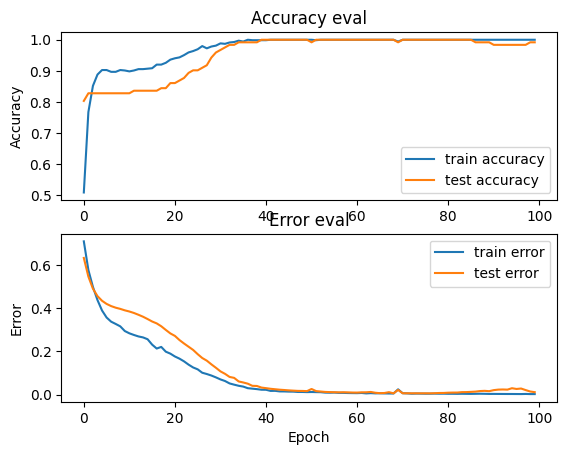

<Figure size 2880x2160 with 0 Axes>

In [2]:
if __name__ == "__main__":
    
    # create train, validation and test sets
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.05, 0.15)
    
    # build the CNN net
    input_shape = (X_train.shape[1], X_train.shape[2]) # 130, 13
    model = build_model(input_shape)
    
    # compile the network
    optimizer = keras.optimizers.Adam(learning_rate = 0.00001)
    model.compile(optimizer = optimizer, loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])
    model.summary()
    
    # train the RNN-LSTM
    history = model.fit(X_train, y_train, validation_data = (X_validation, y_validation), batch_size = 32, epochs = 100)
    
    # evaluate the RNN-LSTM on the test set
    test_error, test_accuracy = model.evaluate(X_test, y_test, verbose = 1)
    print("Accuracy on test set is: {}".format(test_accuracy))
    
    # make prediction on a sample
    X = X_test[0]
    y = y_test[0]

    predict(model, X, y)
    
    # plot accuracy and error over the epochs
    plot_history(history)

In [3]:
model.save('02_model/1205_30s.h5')
# model=keras.models.load_model('02_model/1205_30s.h5')

In [4]:
X_test_pre = model.predict(X_test)
y_pre = np.argmax(X_test_pre, axis = 1)

import sklearn.metrics as sm
matrixes = sm.confusion_matrix(y_test, y_pre)
print(matrixes)
report = sm.classification_report(y_test, y_pre)
print(report)

[[39  0]
 [ 1  3]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       1.00      0.75      0.86         4

    accuracy                           0.98        43
   macro avg       0.99      0.88      0.92        43
weighted avg       0.98      0.98      0.98        43



In [40]:
X_dev, y_dev = load_data("data_add_30s.json")
y_dev_pre_prob = model.predict(X_dev)
y_dev_pre = np.argmax(y_dev_pre_prob, axis = 1)
matrixes = sm.confusion_matrix(y_dev, y_dev_pre)
print(matrixes)
report = sm.classification_report(y_dev, y_dev_pre)
print(report)

[[780   2]
 [  5  76]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       782
           1       0.97      0.94      0.96        81

    accuracy                           0.99       863
   macro avg       0.98      0.97      0.98       863
weighted avg       0.99      0.99      0.99       863



In [48]:
y_dev_pre_prob

array([[9.9894089e-01, 1.0591602e-03],
       [9.9925286e-01, 7.4716244e-04],
       [9.9920088e-01, 7.9915446e-04],
       ...,
       [1.1059815e-02, 9.8894018e-01],
       [7.9438525e-01, 2.0561481e-01],
       [4.7471733e-03, 9.9525285e-01]], dtype=float32)

In [15]:
y_dev_pre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [35]:
y_dev_pre_prob[:, 0] 

array([0.9989409 , 0.99925286, 0.9992009 , 0.9991334 , 0.9990952 ,
       0.9990521 , 0.99894685, 0.9988972 , 0.99929965, 0.9992938 ,
       0.99898785, 0.9992223 , 0.998858  , 0.9980171 , 0.9990652 ,
       0.99883586, 0.99927324, 0.9992299 , 0.99916947, 0.99911994,
       0.9992487 , 0.99929607, 0.99914145, 0.9991026 , 0.9989624 ,
       0.9991399 , 0.9985574 , 0.99913365, 0.99850345, 0.998566  ,
       0.99854636, 0.997159  , 0.9987632 , 0.9992786 , 0.9992518 ,
       0.9991423 , 0.9991007 , 0.99920195, 0.9992378 , 0.9992563 ,
       0.99883014, 0.99866235, 0.9989353 , 0.9994783 , 0.99917406,
       0.99909997, 0.99882144, 0.9991381 , 0.999275  , 0.9989662 ,
       0.99871707, 0.99730873, 0.999318  , 0.9989808 , 0.999231  ,
       0.99941087, 0.9991937 , 0.9991165 , 0.99907047, 0.99912935,
       0.9990639 , 0.9990701 , 0.9990865 , 0.9990658 , 0.9993486 ,
       0.9992416 , 0.99927264, 0.9993777 , 0.9992835 , 0.99906856,
       0.9992143 , 0.99910104, 0.9988738 , 0.99921596, 0.99882

In [42]:
y_dev_pre_09 = [0 if x > 0.9 else 1 for x in y_dev_pre_prob[:, 0]]

In [43]:
y_dev_pre_09 == y_dev_pre

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [44]:
matrixes = sm.confusion_matrix(y_dev, y_dev_pre_09)
print(matrixes)
report = sm.classification_report(y_dev, y_dev_pre_09)
print(report)

[[779   3]
 [  3  78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       782
           1       0.96      0.96      0.96        81

    accuracy                           0.99       863
   macro avg       0.98      0.98      0.98       863
weighted avg       0.99      0.99      0.99       863



In [45]:
y_dev_pre_099 = [0 if x > 0.99 else 1 for x in y_dev_pre_prob[:, 0]]
y_dev_pre_099 == y_dev_pre

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [46]:
matrixes = sm.confusion_matrix(y_dev, y_dev_pre_099)
print(matrixes)
report = sm.classification_report(y_dev, y_dev_pre_099)
print(report)

[[777   5]
 [  2  79]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       782
           1       0.94      0.98      0.96        81

    accuracy                           0.99       863
   macro avg       0.97      0.98      0.98       863
weighted avg       0.99      0.99      0.99       863



In [47]:
y_dev_pre_0999 = [0 if x > 0.999 else 1 for x in y_dev_pre_prob[:, 0]]
matrixes = sm.confusion_matrix(y_dev, y_dev_pre_0999)
print(matrixes)
report = sm.classification_report(y_dev, y_dev_pre_0999)
print(report)

[[580 202]
 [  0  81]]
              precision    recall  f1-score   support

           0       1.00      0.74      0.85       782
           1       0.29      1.00      0.45        81

    accuracy                           0.77       863
   macro avg       0.64      0.87      0.65       863
weighted avg       0.93      0.77      0.81       863



In [54]:
[x - y for x, y in y_dev_pre_prob]

[0.9978817,
 0.9985057,
 0.9984017,
 0.9982668,
 0.9981904,
 0.9981042,
 0.9978937,
 0.99779445,
 0.99859923,
 0.9985876,
 0.9979757,
 0.99844456,
 0.99771595,
 0.99603415,
 0.9981304,
 0.99767166,
 0.9985465,
 0.9984598,
 0.9983389,
 0.99823993,
 0.99849737,
 0.9985922,
 0.9982829,
 0.9982052,
 0.99792475,
 0.99827987,
 0.99711484,
 0.9982673,
 0.9970069,
 0.9971319,
 0.9970927,
 0.994318,
 0.9975264,
 0.9985572,
 0.99850357,
 0.9982846,
 0.9982013,
 0.9984039,
 0.99847555,
 0.9985126,
 0.9976602,
 0.9973247,
 0.99787056,
 0.99895656,
 0.9983481,
 0.9981999,
 0.99764293,
 0.9982763,
 0.9985501,
 0.99793243,
 0.99743414,
 0.99461746,
 0.998636,
 0.99796164,
 0.998462,
 0.99882174,
 0.99838746,
 0.99823296,
 0.99814093,
 0.9982587,
 0.9981278,
 0.9981402,
 0.998173,
 0.99813163,
 0.99869716,
 0.9984832,
 0.9985453,
 0.99875546,
 0.9985669,
 0.9981371,
 0.99842864,
 0.9982021,
 0.9977475,
 0.9984319,
 0.99764717,
 0.9965185,
 0.9977188,
 0.998291,
 0.9984188,
 0.9984867,
 0.9984634,
 0.9

In [62]:
y_dev_pre_c = [0 if x > y - 0.9 else 1 for x, y in y_dev_pre_prob]
matrixes = sm.confusion_matrix(y_dev, y_dev_pre_c)
print(matrixes)
report = sm.classification_report(y_dev, y_dev_pre_c)
print(report)

[[781   1]
 [  9  72]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       782
           1       0.99      0.89      0.94        81

    accuracy                           0.99       863
   macro avg       0.99      0.94      0.96       863
weighted avg       0.99      0.99      0.99       863



In [6]:
test_error, test_accuracy = model.evaluate(X_dev, y_dev, verbose = 1)
print("Accuracy on dev set is: {}".format(test_accuracy))

27/27 [==============================] - 2s 56ms/step - loss: 0.0301 - accuracy: 0.9919
Accuracy on dev set is: 0.9918887615203857


AUC for the testing set : 0.999210634334249


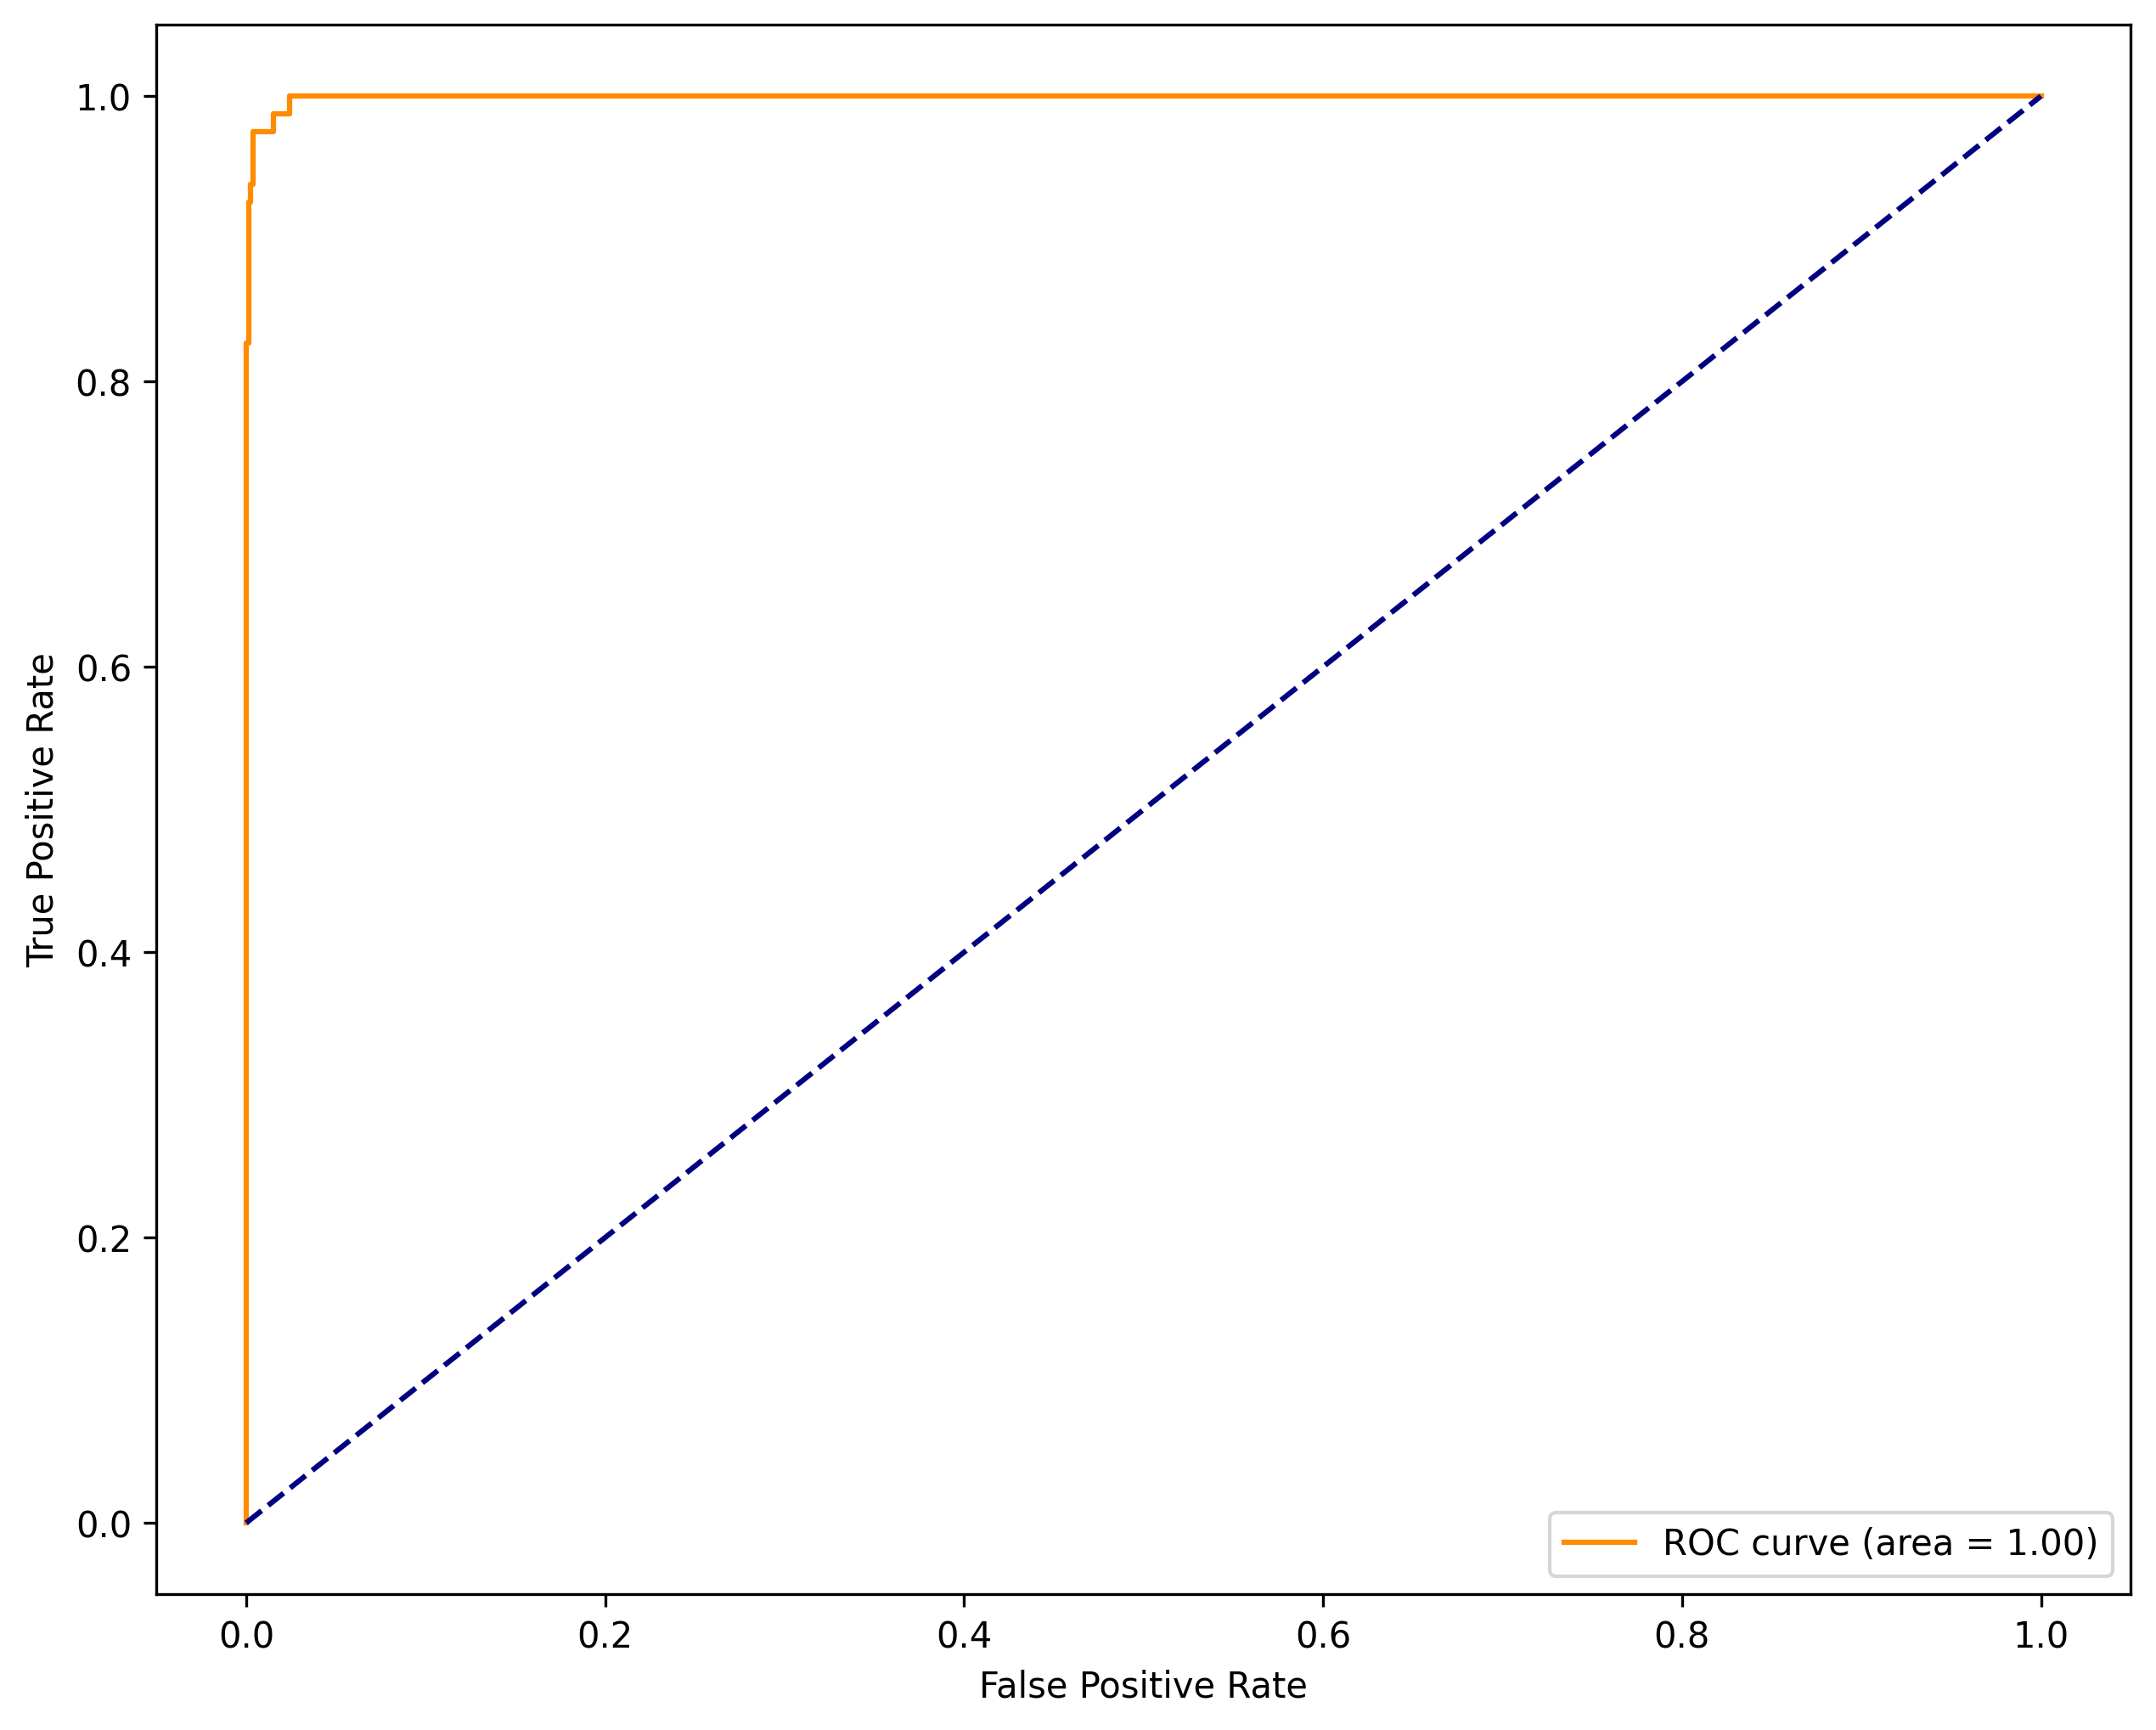

In [29]:
# from scipy.special import softmax
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_dev, y_dev_pre_prob[:, 1]) 
roc_auc = auc(fpr, tpr)
print("AUC for the testing set :", roc_auc)  # 输出AUC值
# 绘制ROC曲线
plt.figure(dpi=300, figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()